In [33]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

In [34]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people)

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
        0.3803922 ],
       [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
        0.53594774],
       [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
        0.7163399 ],
       ...,
       [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
        0.19346406],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
        0.6117647 ],
       [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
        0.2535948 ]], dtype=float32), 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
         0.24836601, 0.20653595],
        [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
         0.2535948 , 0.21568628],
        [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
         0.24183007, 0.21568628],
        ...,
        [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
         0.40261438, 0.39

In [35]:
x, y = lfw_people.images, lfw_people.target
target_names = lfw_people.target_names  # Names of people

print(f"Dataset shape: {x.shape}, Labels shape: {y.shape}")

Dataset shape: (1288, 50, 37), Labels shape: (1288,)


In [36]:
x

array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
         0.24836601, 0.20653595],
        [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
         0.2535948 , 0.21568628],
        [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
         0.24183007, 0.21568628],
        ...,
        [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
         0.40261438, 0.39084968],
        [0.30980393, 0.23398693, 0.17124183, ..., 0.39869282,
         0.4013072 , 0.3764706 ],
        [0.28366014, 0.2248366 , 0.18039216, ..., 0.38169935,
         0.38823533, 0.3803922 ]],

       [[0.14771242, 0.19738562, 0.1751634 , ..., 0.24183007,
         0.2       , 0.14509805],
        [0.18039216, 0.24836601, 0.24575163, ..., 0.21437909,
         0.21960784, 0.1751634 ],
        [0.21045752, 0.303268  , 0.33594772, ..., 0.2653595 ,
         0.18431373, 0.16993465],
        ...,
        [0.2875817 , 0.29803923, 0.29673204, ..., 0.503268  ,
         0.46797386, 0.4535948 ],
        [0.2

In [37]:
y

array([5, 6, 3, ..., 5, 3, 5])

In [38]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [49]:
print(y[1])  # Example label
print(target_names[y[1]])  # Corresponding person's name


6
Tony Blair


In [41]:
print(f"Min pixel value: {x.min()}, Max pixel value: {x.max()}")

Min pixel value: 0.0, Max pixel value: 1.0


In [42]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Reshape images to (50, 37, 1) for CNN (Adding channel dimension)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)


In [48]:
# One-hot encode the labels
y_categorical = to_categorical(y)
y_categorical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [50]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

print(f"Training data: {x_train.shape}, Test data: {x_test.shape}")

Training data: (1030, 50, 37, 1), Test data: (258, 50, 37, 1)


In [63]:
x_train
#x_test
#y_train
#y_test

array([[[[0.2784314 ],
         [0.31895426],
         [0.17777778],
         ...,
         [0.23006536],
         [0.19477125],
         [0.10457516]],

        [[0.275817  ],
         [0.29542485],
         [0.18169935],
         ...,
         [0.21699347],
         [0.2       ],
         [0.17385621]],

        [[0.3281046 ],
         [0.31764707],
         [0.2522876 ],
         ...,
         [0.23398693],
         [0.19869281],
         [0.19738562]],

        ...,

        [[0.24705882],
         [0.24183007],
         [0.2522876 ],
         ...,
         [0.69934636],
         [0.7986929 ],
         [0.5882353 ]],

        [[0.2509804 ],
         [0.25490198],
         [0.26143792],
         ...,
         [0.7843137 ],
         [0.6993465 ],
         [0.18954249]],

        [[0.24313726],
         [0.24052288],
         [0.23921569],
         ...,
         [0.76862746],
         [0.27320263],
         [0.00130719]]],


       [[[0.84313726],
         [0.8392157 ],
         [0.85

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 37, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(target_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4928)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         630,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,631 (2.48 MB)

 Trainable params: 650,631 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))
history

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3834 - loss: 1.7557 - val_accuracy: 0.4612 - val_loss: 1.6291
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3863 - loss: 1.7449 - val_accuracy: 0.4612 - val_loss: 1.6027
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3639 - loss: 1.7637 - val_accuracy: 0.4612 - val_loss: 1.5164
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4084 - loss: 1.5993 - val_accuracy: 0.4961 - val_loss: 1.3539
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4702 - loss: 1.4123 - val_accuracy: 0.6473 - val_loss: 1.1977
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5847 - loss: 1.1725 - val_accuracy: 0.6822 - val_loss: 0.9478
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6193 - loss: 1.0328 - val_accuracy: 0.7403 - val_loss: 0.7927
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6757 - loss: 0.8872 - val_accuracy: 0.7984 - v

In [58]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.3f} %")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8722 - loss: 0.4550
Test Accuracy: 86.822 %


In [59]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = model.predict(x_test)

# Convert one-hot encoded labels back to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.55      0.60        11
     Colin Powell       0.81      0.94      0.87        47
  Donald Rumsfeld       0.81      0.77      0.79        22
    George W Bush       0.93      0.95      0.94       119
Gerhard Schroeder       0.78      0.74      0.76        19
      Hugo Chavez       0.82      0.69      0.75        13
       Tony Blair       0.91      0.78      0.84        27

         accuracy                           0.87       258
        macro avg       0.82      0.77      0.79       258
     weighted avg       0.87      0.87      0.87       258



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


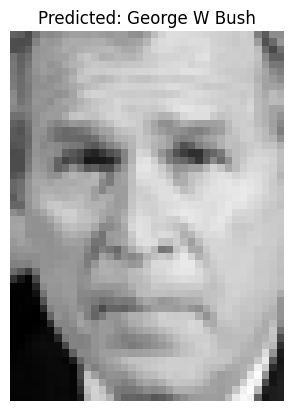

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_face_from_dataset(index):
    # Select an image from X_test
    img = x_test[index]  # Already preprocessed (grayscale, normalized, and shaped)

    # Expand dimensions to match CNN input shape (batch size = 1)
    img_expanded = np.expand_dims(img, axis=0)

    # Predict using the trained CNN model
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)  # Get class index
    predicted_name = target_names[predicted_class]  # Get corresponding name

    # Display the image and prediction
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_name}")
    plt.axis("off")
    plt.show()

# Example usage
predict_face_from_dataset(0)  # Predict the first test image
